# Ejercicio: Predicción de Aprobación de Préstamos usando RandomForest

## Objetivos:
- Entender y aplicar técnicas de preprocesamiento de datos.
- Implementar un modelo de clasificación con RandomForest.
- Evaluar el modelo utilizando métricas de clasificación.

## Exploración de Datos:
- Carga el dataset proporcionado.
- Realiza un análisis exploratorio básico: revisa las estadísticas descriptivas y las distribuciones de las variables.
- Identifica cualquier valor atípico o incoherencia en los datos y discute cómo podrían afectar el modelo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import janitor

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.shape

(4269, 13)

In [5]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [8]:
df = df.clean_names(case_type="lower", strip_underscores=True, remove_special=True)

In [9]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [10]:
df.education.unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [11]:
df.self_employed.unique()

array([' No', ' Yes'], dtype=object)

# Preprocesamiento de Datos:

- Limpia los datos si es necesario (tratamiento de valores faltantes, eliminación de valores atípicos, etc.).
- Codifica las variables categóricas usando técnicas como Label Encoding o One-Hot Encoding.
- Normaliza o escala las características numéricas si lo consideras necesario.

In [12]:
df= df.drop(columns= 'loan_id')

In [13]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\anala\AppData\Local\Temp\ipykernel_23132\242626680.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [14]:
mapping = {'loan_status': {'Approved': 1, 'Rejected': 0}}
df['loan_status'] = df['loan_status'].map(mapping['loan_status'])

In [15]:
y = df['loan_status']
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int64

In [16]:
# Usar Pandas para aplicar One-Hot Encoding
df = pd.get_dummies(df, columns=['education', 'self_employed'])

df

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,True,False,True,False
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,False,True,False,True
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,True,False,True,False
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,True,False,True,False
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,0,True,False,False,True
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,False,True,False,True
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0,False,True,True,False
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,False,True,True,False


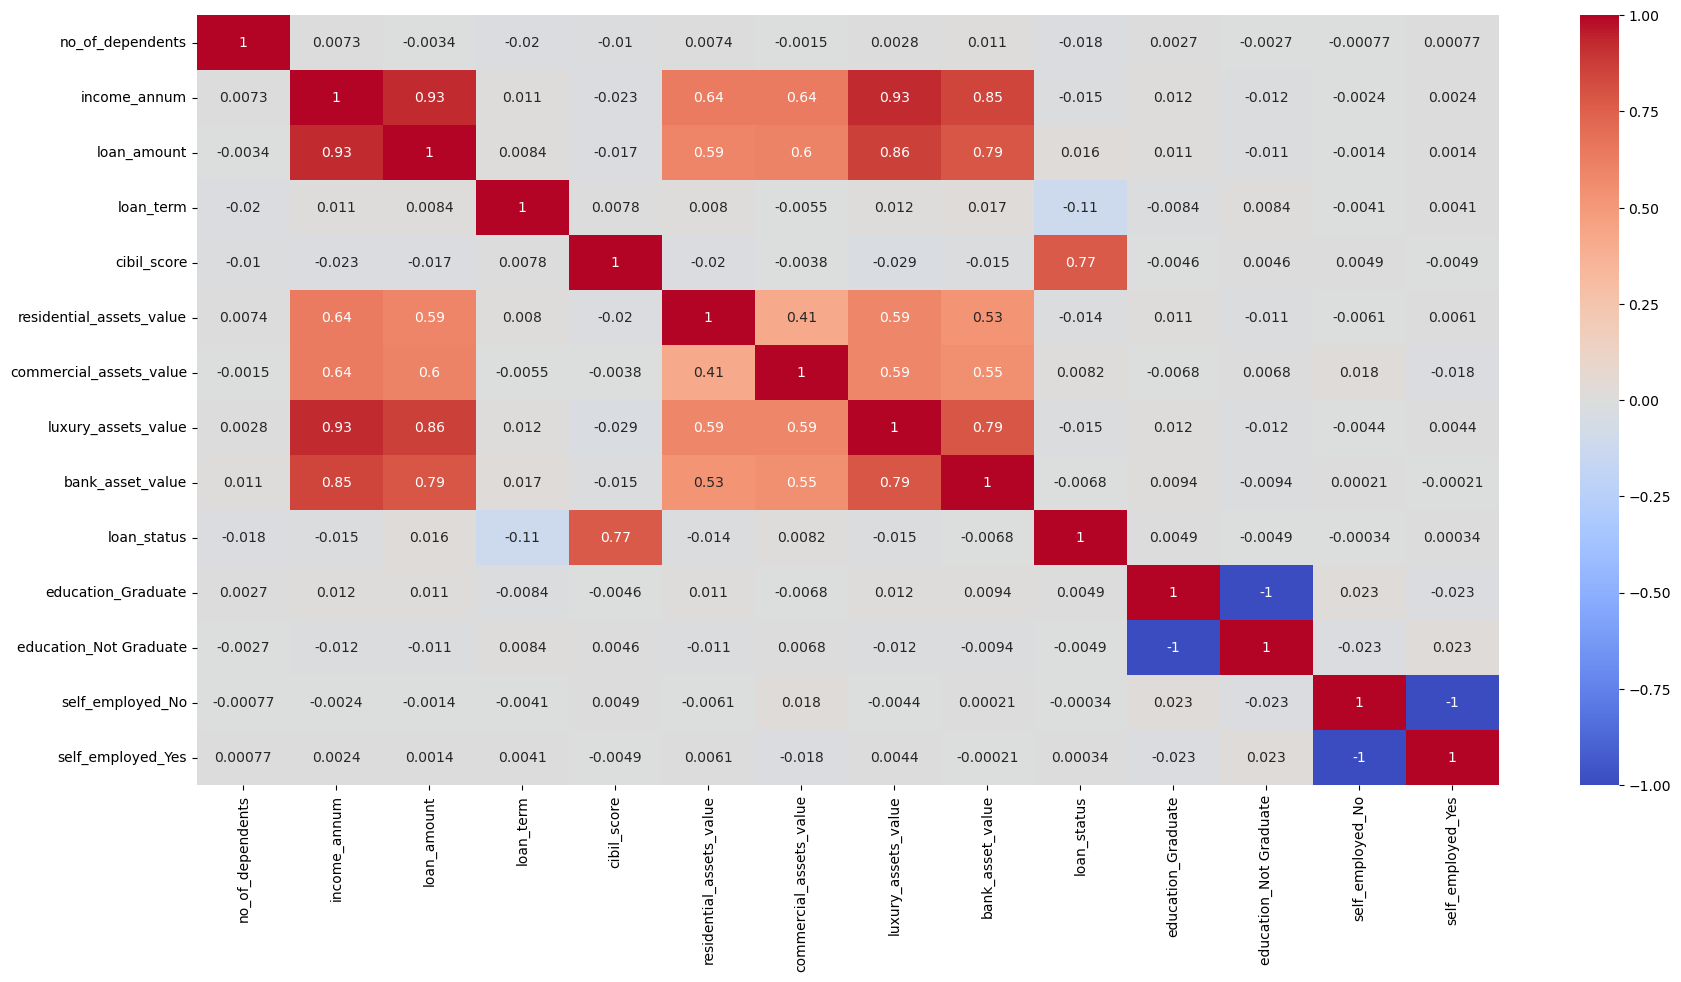

In [22]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(21,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

In [30]:
X = df.drop(columns='loan_status')
X

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,True,False,True,False
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,False,True,False,True
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,True,False,True,False
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,True,False,True,False
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,True,False,False,True
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,False,True,False,True
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,False,True,True,False
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,False,True,True,False


## División del Conjunto de Datos:

- Divide el dataset en un conjunto de entrenamiento y otro de prueba (p.ej., 80/20).

In [32]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42)

X_train.shape, X_test.shape

((3415, 13), (854, 13))

## Construcción del Modelo:

- Utiliza el algoritmo RandomForest para entrenar un modelo de clasificación con el conjunto de entrenamiento.
- Ajusta parámetros como el número de árboles o la profundidad máxima si es necesario.

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf_model = RandomForestClassifier(
    random_state =42,
    n_estimators=100,          # Por defecto: 100
    max_depth=None,            # Por defecto: Sin límite de profundidad
    min_samples_split=2,       # Por defecto: 2
    min_samples_leaf=1,        # Por defecto: 1
    max_features='sqrt',       # Por defecto: 'sqrt' (raíz cuadrada del número de características)
    bootstrap=True             # Por defecto: True
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
y_predict = rf_model.predict(X_test)
y_predict[:5]

array([0, 1, 0, 1, 1], dtype=int64)

## Evaluación del Modelo:

- Evalúa el modelo con el conjunto de prueba.
- Calcula métricas como la precisión, la matriz de confusión, la puntuación F1, entre otras.
- Discute el rendimiento del modelo y cualquier posible mejora

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.99      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



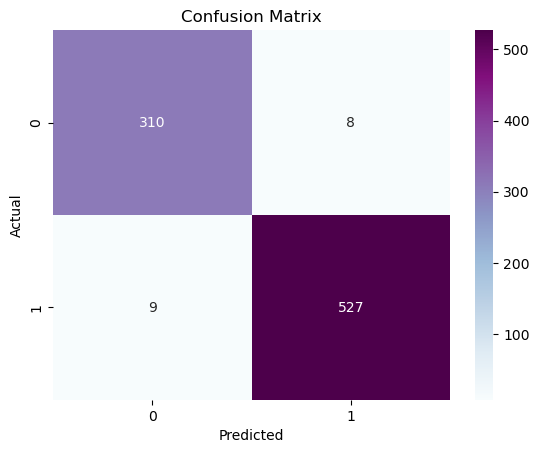

In [66]:
cm = confusion_matrix(y_test, y_predict)

# Nueva matriz de confusión
cm_threshold = confusion_matrix(y_test, y_predict)

# Reporte de clasificación
print(classification_report(y_test, y_predict))
sns.heatmap(cm_threshold, annot=True, cmap='BuPu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Posibles mejoras

In [83]:
rf_model = RandomForestClassifier(
    random_state =42,
    n_estimators=100,          # Por defecto: 100
    max_depth=None,            # Por defecto: Sin límite de profundidad
    min_samples_split=2,       # Por defecto: 2
    min_samples_leaf=1,        # Por defecto: 1
    max_features='sqrt',       # Por defecto: 'sqrt' (raíz cuadrada del número de características)
    bootstrap=False             # Por defecto: True
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, random_state=42)

In [84]:
y_predict = rf_model.predict(X_test)
y_predict[:5]

array([0, 1, 0, 1, 1], dtype=int64)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



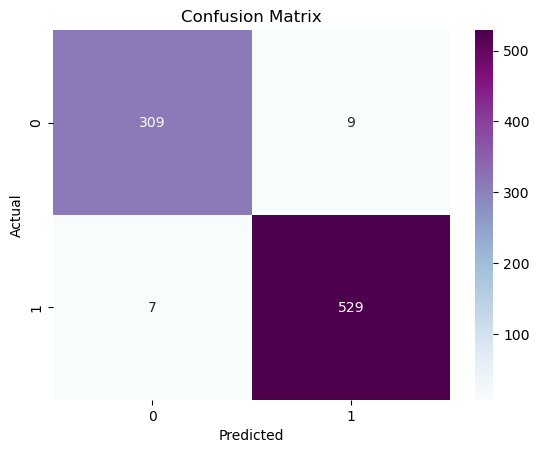

In [85]:
cm = confusion_matrix(y_test, y_predict)

# Nueva matriz de confusión
cm_threshold = confusion_matrix(y_test, y_predict)

# Reporte de clasificación
print(classification_report(y_test, y_predict))
sns.heatmap(cm_threshold, annot=True, cmap='BuPu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()